In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [24]:
pd.set_option("display.max_columns", None)

In [25]:
# Load the dataset
df = pd.read_csv("cars.csv")

In [26]:
# Convert 'horsepower' to numeric and handle missing values
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df.dropna(subset=["horsepower"], inplace=True)
print(df.dtypes)
print(df.shape)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
(392, 9)


In [27]:
# Define features and target variable
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]
X = df[features]
y = df["mpg"]

In [28]:
# Create a pipeline 
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("linear", LinearRegression()),
    ]
)

In [29]:
# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring="r2")
print("R-squared scores for each fold:", scores)
mean_score = scores.mean()
print("Mean R-squared across all folds:", mean_score)

R-squared scores for each fold: [ 0.54841822  0.44300477  0.74502516  0.74246992 -0.46421143]
Mean R-squared across all folds: 0.4029413282798705


In [30]:
# Manual fitting to compare
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [31]:
# manual splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
#prin tthe outputs
print(f"Mean Squared Error (MSE) on the manual split test set: {mse}")
print(f"R-squared on on the manual split test set: {r2}")

Mean Squared Error (MSE) on the manual split test set: 14.982375206017442
R-squared on on the manual split test set: 0.7064615203237841


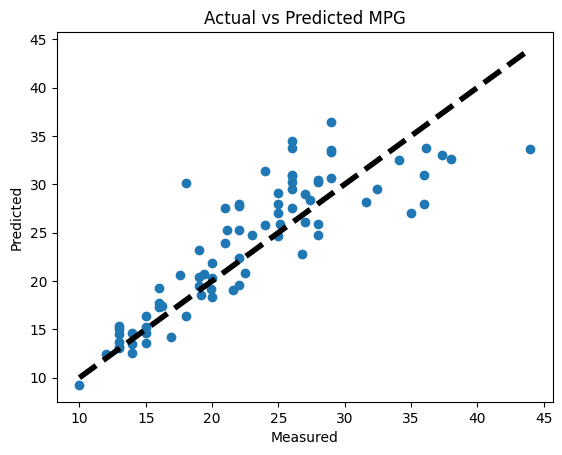

In [33]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted MPG")
plt.show()